# Artificial Neural Networks
In this exercise, several parts of the code are missing, which should be completed by you. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import sklearn
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn.metrics import accuracy_score
sns.set()

%matplotlib inline

## MLP for Skin disease dataset using `scikit-learn`

Now let us apply a neural network on the skin disesase data. To reduce the training time we reduce the amount of data in our dataset.

In [2]:
df = pd.read_csv("skin_disease.csv")
df = df.sample(frac=1)
df = df.iloc[0:100000]
df.head()

,class,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
321097,1,0.0,1.0,146.803696,146.523499,148.061279,2.687050,2.307853,11.867569,2.337752,1.718121,-7.890529,3.511095,2.936168,14.708332
369319,0,0.0,1.0,147.726944,142.700180,135.994049,1.718374,1.884356,9.526067,1.167531,-1.294433,9.130569,2.348968,2.505262,12.324208
257867,1,0.0,1.0,146.221893,144.206421,132.246872,1.454083,2.776567,7.053739,0.315222,-2.041615,5.701283,1.778443,3.617439,9.583660
6870,0,0.0,1.0,148.394958,137.128250,108.684502,1.080449,0.934561,12.131411,-1.053084,-0.607379,-5.108250,1.576523,1.206285,14.707682
477050,0,0.0,1.0,147.810623,142.992310,125.166321,1.168441,1.926482,15.939886,-0.953198,-0.629208,-12.651587,1.599050,2.570897,19.383097


In [3]:
X = df.drop(columns=["class"])
y = df["class"]

> Split the data into a train and test set. Use 40% of the data for the test set.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

We define our Multi Layer Perceptron with 2 hidden layers. This time we use the [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) implementation from Scikit-Learn.

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(30,4),
                    activation='relu',  # activation function
                    solver='adam',  # optimizer
                    batch_size=1024)  # size of minibatches

> Train the neural network on `X_train`, `y_train` and plot the loss by accessing the attribute `loss_curve_`.

In [6]:
def plot_costs(costs):
    fig, ax = plt.subplots()
    ax.plot(costs)
    ax.set_title("Loss curve")
    plt.show()

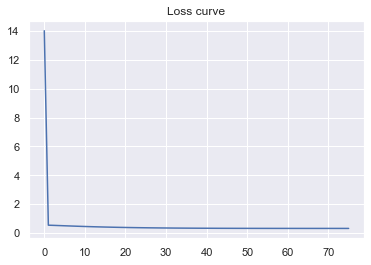

In [7]:
mlp.fit(X_train, y_train)
plot_costs(mlp.loss_curve_)

> Implement your own predict function. For that we'll need an activation function for the hidden layers, in our case `relu` and for the output layer `sigmoid`.

In [17]:
def relu(x):
    ### START YOUR CODE ###
    return np.max(0,x)
    ### END YOUR CODE ###
    

In [19]:
def relu(x):
    return np.maximum(0, x)

In [21]:
def sigmoid(x):
    ### START YOUR CODE ###
    sig = 1 / ( 1+ np.exp(-x))
    ### END YOUR CODE ###
    return sig

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
def predict(mlp, X):
    ### START YOUR CODE ###
    
    # define the first activations, e.g. inputs
    
    # forward propagate through layers
            
    # last layer output activation `sigmoid`
    
    # transform to 1-D and threshold
    
    ### END YOUR CODE ###
    
    pass

In [13]:
def predict(mlp, X):
    # define the first activations, e.g. inputs
    A = X
    
    # forward propagate through layers
    for i, (W, B) in enumerate(zip(mlp.coefs_, mlp.intercepts_)):
        z = A.dot(W) + B
        # if hidden layer, apply `relu`
        if i != mlp.n_layers_ - 2:
            A = relu(z)
            
    # last layer output activation `sigmoid`
    out = sigmoid(z)  
    # transform to 1-D and threshold
    out = np.squeeze(out)
    out = np.array(out > 0.5, dtype=int)
    
    return out

> Test your implementation with the scikit-learn predict function.

In [22]:
y_pred_scikit = mlp.predict(X_test)
y_pred_own = predict(mlp,X_test)

print('Are the outputs the same: %s' % (y_pred_scikit == y_pred_own).all())

Are the outputs the same: True


In [23]:
y_pred_scikit = mlp.predict(X_test)
y_pred_own = predict(mlp, X_test.values)

print('Are the outputs the same: %s' % (y_pred_scikit == y_pred_own).all())

Are the outputs the same: True


> Predict the values on the test set and calculate the accuracy and the f1-score.

In [31]:
y_pred = predict(mlp, X_test.values)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: %.4f" % accuracy)
print("F1: %.4f" % f1)

Accuracy: 0.9059
F1: 0.0000


## MLP for Skin disease dataset using `TensorFlow`
In practice, the MLP from `scikit-learn` is never used because of the lack of customisation and the absence of GPU training. `TensorFlow` is a library specialised in deep learning and therefore also has implementations for advanced techniques. Thus the section below is a quick introduction to how the same network can be implemented using `TensorFlow`. The networks' results do not need to be the same, since as mentioned above, the `scikit-learn` implementation can not be as customised as the `TensorFlow` one. 

If `TensorFlow` is not already installed on the environment, it can be done using the "magic" cell from below. If it is already installed, make sure to use version `2.3.1`. Higher versions should also work but weren't tested.

In [ ]:
!pip install tensorflow==2.3.1

In [26]:
import tensorflow as tf

#assert tf.__version__ == '2.3.1'
tf.__version__

'2.8.0'

A model in `TensorFlow` can be implemented using the `Sequential API`, which enables for easy extensibility by calling `.add()`. To implement the same MLP as above, we can sequentially add `Dense` layers to the model. Here the customization possibilities compared to `scikit-learn` is evident. For example, the activation function can be set for each layer separately, which was impossible before.

In [27]:
dataset_dim = X_train.shape[1]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(30, input_shape=(dataset_dim, ), activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                450       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 931
Trainable params: 931
Non-trainable params: 0
_________________________________________________________________


After defining the model, it needs to be compiled using an optimizer and loss function. In our case, we'll use adam as optimizer and binary cross-entropy as loss. Now the model can be trained by specifying the number of epochs and the batch size. 

In [28]:
adam = tf.keras.optimizers.Adam()
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=1024, epochs=150) 

Epoch 1/150
59/59 [==============================] - 1s 1ms/step - loss: 0.2897 - accuracy: 0.8982
Epoch 2/150
59/59 [==============================] - 0s 1ms/step - loss: 0.2318 - accuracy: 0.9125
Epoch 3/150
59/59 [==============================] - 0s 1ms/step - loss: 0.2167 - accuracy: 0.9153
Epoch 4/150
59/59 [==============================] - 0s 1ms/step - loss: 0.2058 - accuracy: 0.9189
Epoch 5/150
59/59 [==============================] - 0s 1ms/step - loss: 0.1968 - accuracy: 0.9226
Epoch 6/150
59/59 [==============================] - 0s 1ms/step - loss: 0.1906 - accuracy: 0.9246
Epoch 7/150
59/59 [==============================] - 0s 1ms/step - loss: 0.1835 - accuracy: 0.9272
Epoch 8/150
59/59 [==============================] - 0s 1ms/step - loss: 0.1787 - accuracy: 0.9293
Epoch 9/150
59/59 [==============================] - 0s 1ms/step - loss: 0.1763 - accuracy: 0.9306
Epoch 10/150
59/59 [==============================] - 0s 1ms/step - loss: 0.1718 - accuracy: 0.9313
Epoch 11/

We can also plot the loss curve using the same function as above.

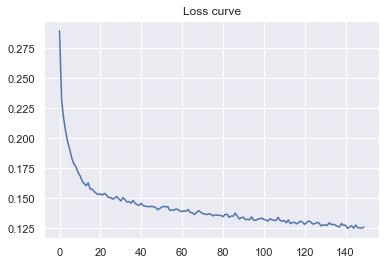

In [29]:
plot_costs(history.history["loss"])

The model can also be evaluated on the test set with familiar code.

In [30]:
y_pred = model.predict(X_test)
y_pred = np.array(y_pred > 0.5, dtype=int).squeeze()

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: %.4f" % accuracy)
print("F1: %.4f" % f1)

Accuracy: 0.9501
F1: 0.6928
